## Problem Statement 1

In [63]:
import random
distribution = (0.2,0.4,0.1,0.1,0.1,0.1)

def throw(distribution):
    randThrow = random.random()
    sum = 0
    ans = 1
    for i in distribution:
        sum = sum + i
        if randThrow < sum:
            return ans
        ans = ans + 1

def dice(n):
  step = 0;
  numstep = 0;

  for i in range(100000):
    for i in range(250):
      ans = throw(n)

      if ans == 1 or ans == 2:
        step=max(0,step-1)
      elif ans >= 3 and ans <= 5:
        step=step+1
      else: 
        result = throw(n)
        step = step + result
    if step>60:
      numstep = numstep+1
  return numstep

numstep = dice(distribution)
a = numstep/100000
print("Probability = ", a)

Probability =  0.28587


## Problem Statement 2

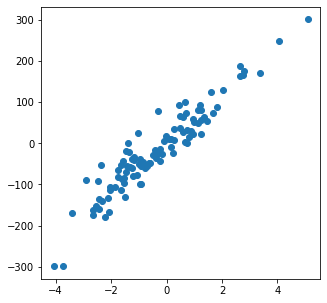

In [49]:
from sklearn.datasets import make_regression

X1, y1 = make_regression(n_samples=100, n_features=3, noise=0.3)

pyplot.scatter(X1[:,0]+X1[:,1]+X1[:,2],y1)
pyplot.show()


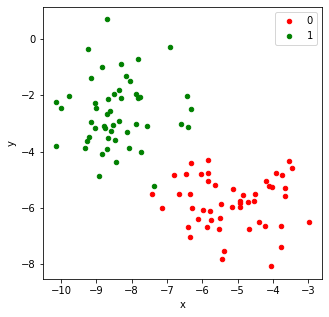

In [50]:
from sklearn.datasets import make_blobs
import pandas as pd

# 2d classification dataset

X2, y2 = make_blobs(n_samples=100, centers=2, n_features=2)


# scatter plot

df = pd.DataFrame(dict(x=X2[:,0], y=X2[:,1], label=y2))
colors = {0:'red', 1:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

pyplot.show()

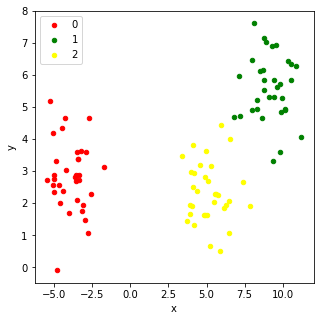

In [51]:

X3, y3 = make_blobs(n_samples=100, centers=3, n_features=2)

df = pd.DataFrame(dict(x=X3[:,0], y=X3[:,1], label=y3))
colors = {0:'red', 1:'green', 2:'yellow'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

# Problem Statement 3

## 3(a)

In [0]:
class LinearRegression():
    def __init__(self, X, y, alpha=0.03, n_iter=1500):

        self.alpha = alpha
        self.n_iter = n_iter
        self.n_samples = len(y)
        self.n_features = np.size(X, 1)
        self.X = np.hstack((np.ones(
            (self.n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))
        self.y = y[:, np.newaxis]
        self.params = np.zeros((self.n_features + 1, 1))
        self.coef_ = None
        self.intercept_ = None

    def fit(self):

        for i in range(self.n_iter):
            self.params = self.params - (self.alpha/self.n_samples) * \
            self.X.T @ (self.X @ self.params - self.y)

        self.intercept_ = self.params[0]
        self.coef_ = self.params[1:]

        return self

    def score(self, X=None, y=None):

        if X is None:
            X = self.X
        else:
            n_samples = np.size(X, 0)
            X = np.hstack((np.ones(
                (n_samples, 1)), (X - np.mean(X, 0)) / np.std(X, 0)))

        if y is None:
            y = self.y
        else:
            y = y[:, np.newaxis]

        y_pred = X @ self.params
        score = 1 - (((y - y_pred)**2).sum() / ((y - y.mean())**2).sum())

        return score

    def predict(self, X):
        n_samples = np.size(X, 0)
        y = np.hstack((np.ones((n_samples, 1)), (X-np.mean(X, 0)) \
                            / np.std(X, 0))) @ self.params
        return y

    def get_params(self):

        return self.params

In [53]:
from sklearn.model_selection import train_test_split
import numpy as np

X = X1
y = y1

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=42)

our_regressor = LinearRegression(X_train, y_train).fit()

our_train_accuracy = our_regressor.score()

our_test_accuracy = our_regressor.score(X_test, y_test)

pd.DataFrame([[our_train_accuracy],
              [our_test_accuracy]],
             ['Training Accuracy', 'Test Accuracy'])

,0
Training Accuracy,0.999994
Test Accuracy,0.892214


## 3(b)

In [54]:

X = X2 

Y = y2 

Y = Y.reshape(-1,1) 

def sigmoid(z):
    return(1/(1+np.exp(-z)))

def cross_entropy_loss(y_pred,target):
    return -np.mean((target*np.log(y_pred)+(1-target)*np.log(1-y_pred)))

def predict(X_test):
    preds = []
    for i in sigmoid(np.dot(X_test, W) + b):
        if i>0.5:
            preds.append(1)
        else:
            preds.append(0)
    return preds

print(X.shape[1])  #features

np.random.seed(0)
W = np.random.uniform(0,1,size=(X.shape[1],1))
b=0.5

for i in range(10000):
    Z = np.dot(X, W) + b
    Y_output = sigmoid(Z)
    E = cross_entropy_loss(Y_output,Y)
    print(E)
    grad= Y_output - Y
    grad_weight= np.dot(X.T,grad)/X.shape[0]
    grad_bias = np.average(grad)
    W=W-.01*grad_weight
    b=b-.01*grad_bias

Y_test = predict(X_test=[1,1])
print(Y_test)

Streaming output truncated to the last 5000 lines.
0.03929091196633533
0.03928888734452641
0.03928686341735041
0.03928484018443319
0.03928281764540098
0.03928079579988022
0.039278774647497704
0.0392767541878804
0.039274734420655565
0.039272715345450855
0.03927069696189403
0.03926867926961322
0.03926666226823679
0.03926464595739341
0.03926263033671201
0.03926061540582179
0.03925860116435222
0.039256587611933014
0.039254574748194195
0.039252562572766055
0.03925055108527915
0.03924854028536428
0.03924653017265257
0.03924452074677534
0.03924251200736426
0.03924050395405126
0.03923849658646845
0.03923648990424828
0.039234483907023485
0.039232478594427043
0.03923047396609217
0.039228470021652403
0.03922646676074153
0.03922446418299361
0.039222462288042895
0.03922046107552402
0.03921846054507185
0.03921646069632146
0.039214461528908236
0.039212463042467866
0.03921046523663622
0.039208468111049485
0.03920647166534415
0.03920447589915687
0.0392024808121246
0.039200486403884655
0.039198492674074

## 3(c)

In [0]:
import matplotlib.pyplot as plt
import statistics as st

plt.rcParams['figure.figsize'] = (5, 5)

class RidgeLinearRegression:
       def __init__(self,X_data,Y_data,l,l2,iterations): #initialize all parameters
           self.X=X_data
           self.Y=Y_data
           #weight and bias
           self.m=0
           self.c=0
           self.L=l #learning rate
           self.l2=l2 #regularization parameter
           self.iter=iterations 
           self.n=float(len(self.X))  #size of data
       
       def cost(self,pred_y): #cost function
           cost=np.sum(np.square(self.Y-pred_y))/(2*self.n) + self.l2*np.sum(np.square(self.m))
           return(cost)
       
       def fit(self):
           self.history=np.zeros(self.iter)
           #updating values of m and c
           for i in range(self.iter):
               pred_y=self.m*self.X + self.c
               #print(pred_y)
               Dm= (-2/self.n)*(self.X*(self.Y-pred_y))+2*self.l2*self.m
               Dc= (-2/self.n)*(self.Y-pred_y)
               #update
               self.m=self.m-Dm*self.L
               self.c=self.c-Dc*self.L
               #cost is calculated for every iteration
               self.history[i]=self.cost(pred_y)
           self.mse=self.MSE(self.Y,pred_y)
               
                  
      
       def MSE(self,pred_y,Y):
           errors=Y-pred_y #error is the difference between actual and predicted value
           mse=np.sum(np.square(errors))/self.n #mean of sum of square of erros
           return mse
       
       def results(self):
           fig=plt.figure(figsize=(7,10))
           a1=fig.add_subplot(211)

           plt.title('minimisation of errors across the iterations')
           a1.plot(self.history)


           #making predictions
           a2=fig.add_subplot(212)
           final_y=self.m*self.X +self.c 
           plt.scatter(self.X,self.Y)
           plt.title('regrssion line')
           a2.plot([min(self.X),max(self.X)],[min(final_y),max(final_y)],color='red') 
           
           plt.show()
           
           print ('Mean Squared Error=', self.mse)



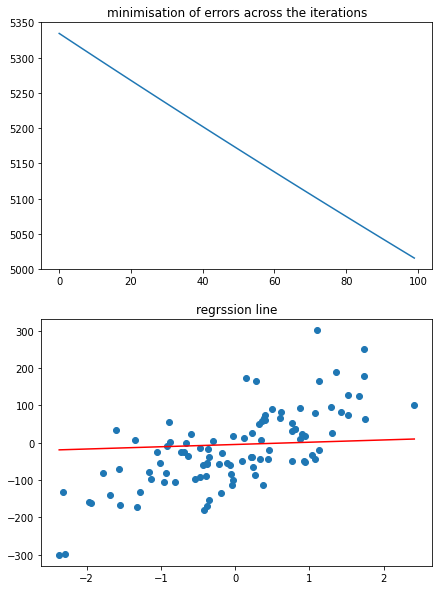

Mean Squared Error= 10030.444551961922


In [56]:
l=RidgeLinearRegression(X1[:,0],y1,0.005,0.001,100)
l.fit()
l.results()

In [0]:
plt.rcParams['figure.figsize'] = (5, 5)


class LassoLinearRegression:
       def __init__(self,X_data,Y_data,l,l1,iterations): #initialize all parameters
           self.X=X_data
           self.Y=Y_data
           #weight and bias
           self.m=np.random.randn(X_data.shape[0])
           self.c=0
           self.L=l #learning rate
           self.l1=l1 #regularization parameter
           self.iter=iterations #num of iterations
           self.n=float(len(X_data))  #size of data
       
       def cost(self,pred_y): #cost function
           cost=np.sum(np.square(self.Y-pred_y))/(2*self.n) + self.l1*np.sum(self.m)
           return(cost)
       
       def fit(self):
           self.history=np.zeros(self.iter)
           pred_y=np.zeros((self.Y.shape))
           for j in range(self.iter):
               for i in range(0,len(self.X)):
                       pred_y[i]=self.m[i]*self.X[i]+self.c
                       if self.m[i]>0:
                           Dm= (-2/self.n)*(self.X[i]*(self.Y[i]-pred_y[i]))-self.l1 
                       else:
                           Dm= (-2/self.n)*(self.X[i]*(self.Y[i]-pred_y[i]))+self.l1


                       Dc= (-2/self.n)*(self.Y[i]-pred_y[i])
                       #update
                       self.m[i]=self.m[i]-Dm*self.L
                       self.c=self.c-Dc*self.L
               self.history[j]=self.cost(pred_y)
           self.mse=self.MSE(self.Y,pred_y)

             
      
       def MSE(self,pred_y,Y):
           errors=Y-pred_y #error is the difference between actual and predicted value
           mse=np.sum(np.square(errors))/self.n #mean of sum of square of erros
           return mse
       
       def results(self):
           fig=plt.figure(figsize=(7, 10))
           a1=fig.add_subplot(211)

           plt.title('minimisation of errors across the iterations')
           a1.plot(self.history)


           #making predictions
           a2=fig.add_subplot(212)
           final_y=self.m*self.X +self.c 
           plt.scatter(self.X,self.Y)
           plt.title('regrssion line')
           a2.plot([min(self.X),max(self.X)],[min(final_y),max(final_y)],color='red')
           
           plt.show()
           
           print ('Mean Squared Error=',self.mse)

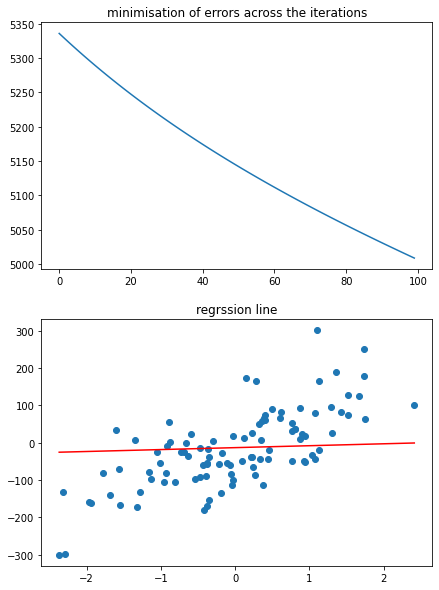

Mean Squared Error= 10017.057411305463


In [58]:
l=LassoLinearRegression(X1[:,0],y1,0.005,0.001,100)
l.fit()
l.results()

## 3(e)

In [0]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [0]:
# X3
clf = K_Means()
clf.fit(X3)


In [61]:
correct = 0
for i in range(len(X3)):
    predict_me = np.array(X3[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction == y3[i]:
        correct += 1
print(correct/len(X3))

0.67
